### Домашнее задание : Линейная регрессия, метод градиентного спуска

In [1]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

<h3>Чтение данных из набора данных:</h3>

In [2]:
#Считывание данных
dataset = pd.read_csv('car_data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#Отображение строки и столбца данных
dataset.shape

(301, 9)

In [4]:
#отображение информации о наборе данных
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#Описание данных
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#Добавление текущего года в набор данных для проверки возраста автомобиля
dataset['Current_Year'] = 2022

In [7]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [8]:
dataset['Age'] = dataset['Current_Year']-dataset['Year']

In [9]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


<h3>Анализ первичных данных приведен (EDA) ниже:</h3>

<AxesSubplot:xlabel='Year', ylabel='count'>

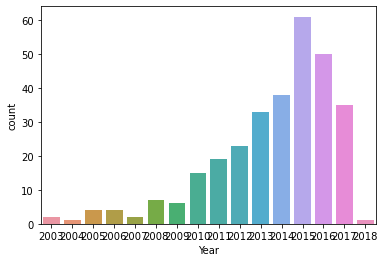

In [10]:
#мы используем countplot, чтобы показать количество наблюдений в каждой категориальной ячейке с помощью столбцов
sns.countplot('Year', data=dataset)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

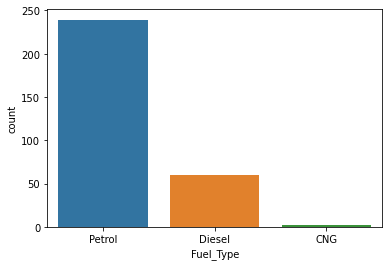

In [11]:
sns.countplot('Fuel_Type', data=dataset)

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

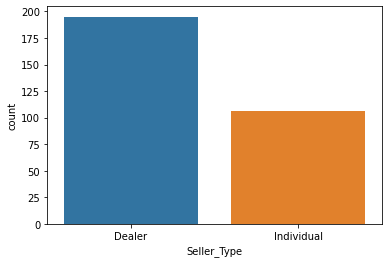

In [12]:
sns.countplot('Seller_Type', data=dataset)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

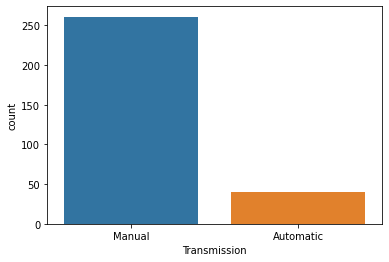

In [13]:
sns.countplot('Transmission', data=dataset)

<p>Distplot представляет одномерное распределение данных, и мы используем этот график для сравнения двух столбцов нашего набора данных.</p>

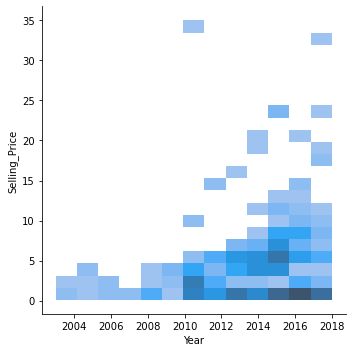

In [14]:
sns.displot(x = 'Year', y = 'Selling_Price', data=dataset)

In [15]:
dataset['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [16]:
dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [17]:
dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [18]:
dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [19]:
#Отображение строки и столбца данных
dataset.shape

(301, 11)

In [20]:
#Проверка нулевого значения в нашем наборе данных :
checkEmptyValue = dataset.isnull()
if checkEmptyValue.empty:
    print("У нас есть пустое значение в наборе данных")
else:
    print("Нет, у нас нет пустого значения в наборе данных")

Нет, у нас нет пустого значения в наборе данных


<h3>Визуализация данных:</h3>
<p>Парный график используется для понимания наилучшего набора признаков, чтобы объяснить взаимосвязь между двумя переменными или сформировать наиболее разделенные кластеры. Это также помогает сформировать некоторые простые модели классификации, нарисовав несколько простых линий или сделав линейное разделение в нашем наборе данных.</p>

<Figure size 2160x2160 with 0 Axes>

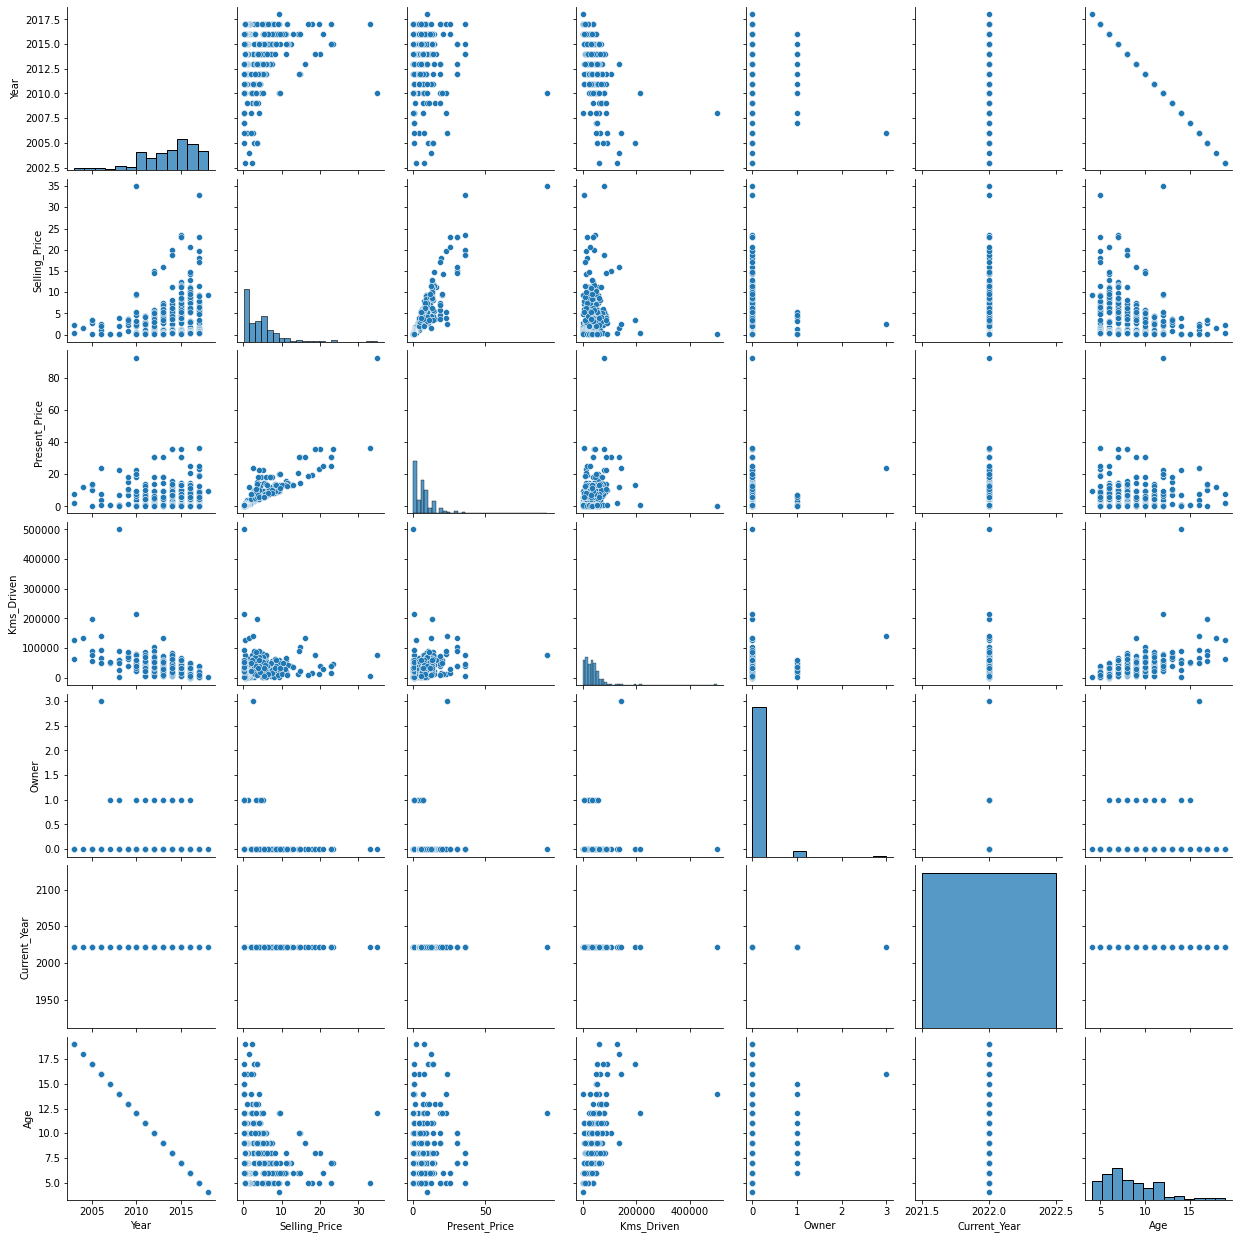

In [21]:
plt.figure(figsize = (30,30))
sns.pairplot(dataset)
plt.show()

In [22]:
numeric_columns = dataset.select_dtypes(include =['int64','float64'])
numeric_columns.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,0,2022,8
1,2013,4.75,9.54,43000,0,2022,9
2,2017,7.25,9.85,6900,0,2022,5
3,2011,2.85,4.15,5200,0,2022,11
4,2014,4.60,6.87,42450,0,2022,8


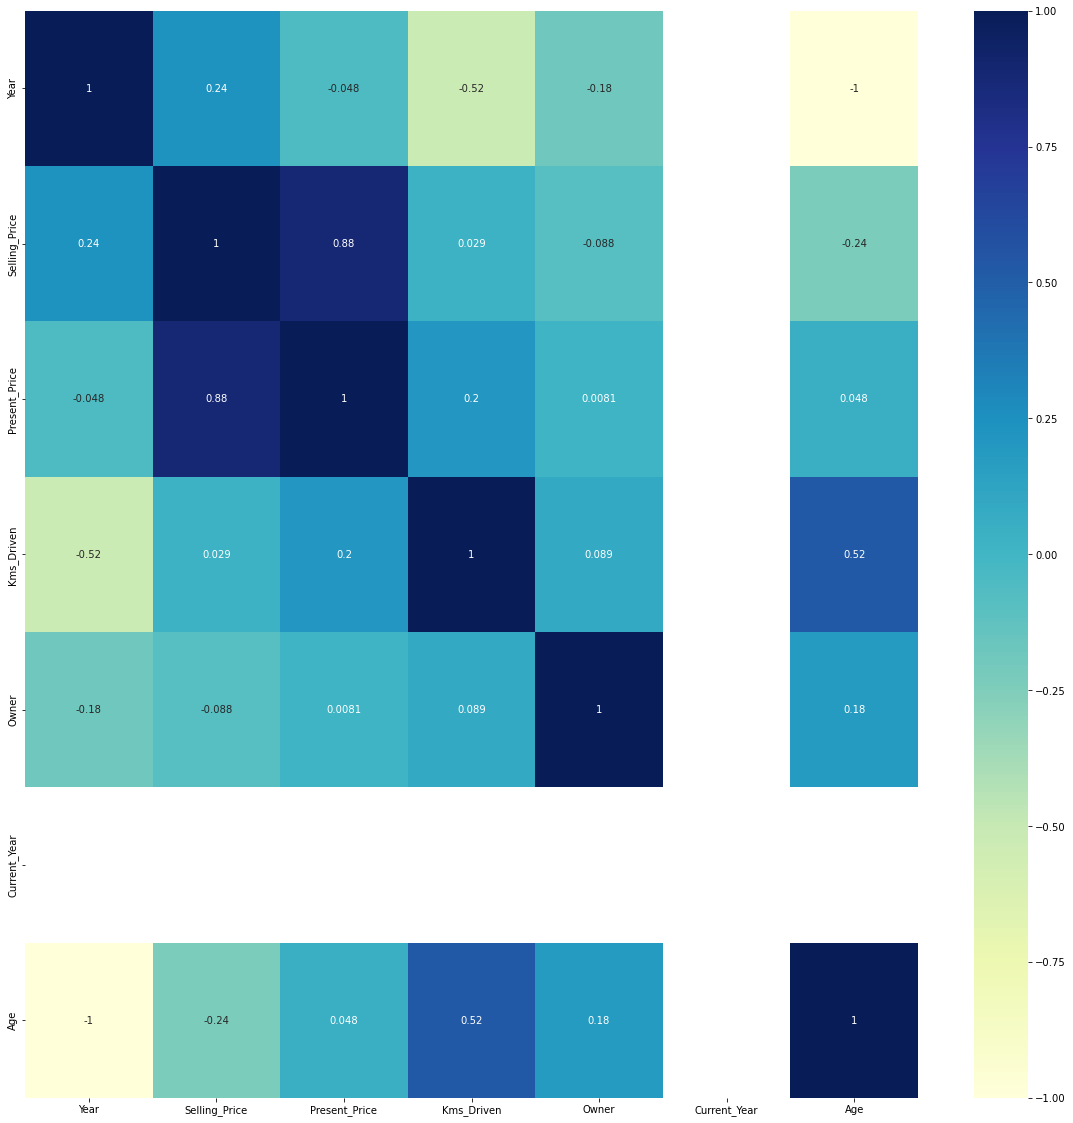

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [24]:
categorical_cols = dataset.select_dtypes(include=['object'])
categorical_cols.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

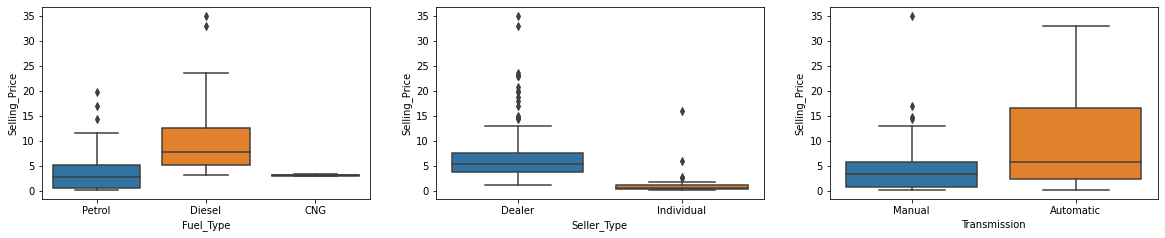

In [25]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=dataset)

plt.subplot(3, 3, 2)
sns.boxplot(x='Seller_Type', y='Selling_Price', data=dataset)

plt.subplot(3, 3, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=dataset)

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

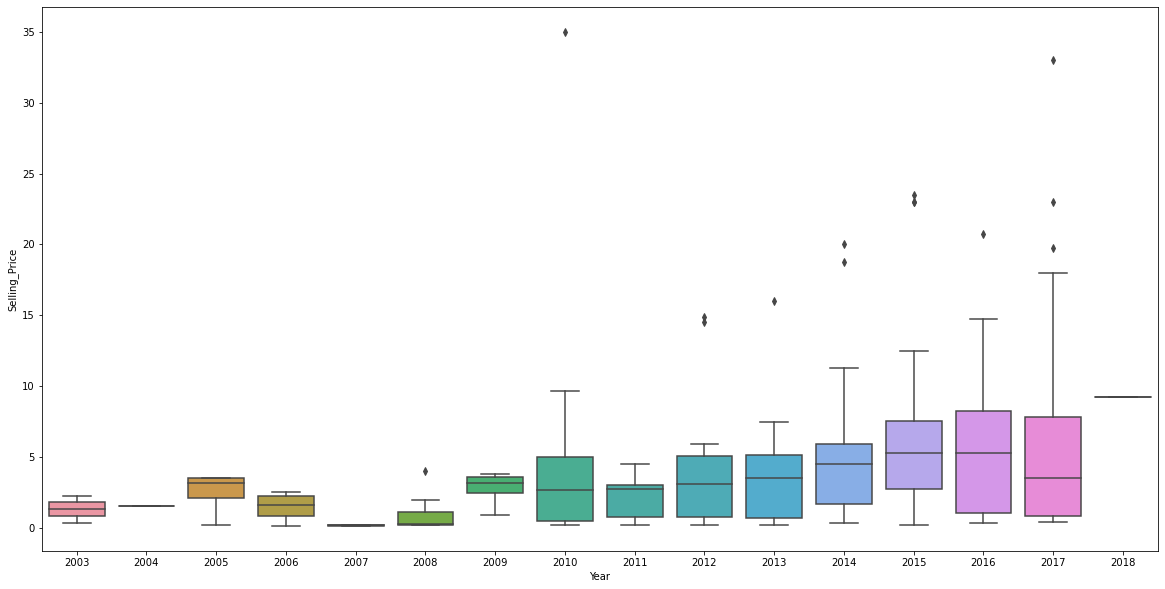

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Selling_Price', data=dataset)

<h3>Некоторая дедукция</h3>
<p>Некоторая дедукция
Таблица цен показывает, что модели автомобилей 2015, 2016 и 2017 годов выпуска слишком дороги, чем другие автомобили, если мы сравним их.
В то время как более дешевые автомобили относятся к автомобилям 2007 и 2004 годов выпуска.

Средняя цена бензиновых автомобилей выше, чем дизельных автомобилей и КПГ.

Большинство продавцов автомобилей являются дилерами, а дилеры - продавцы автомобилей - это нечто большее, чем отдельные продавцы автомобилей.

Большинство автомобилей с высокой ценой продажи имеют механическую коробку передач, и меньше всего автомобилей имеют автоматическую.</p>

<h3>Подготовка данных :</h3>
<p>Одноразовое кодирование - важный шаг для подготовки нашего набора данных к использованию в машинном обучении. Однократное кодирование превращает ваши категориальные данные в двоичное векторное представление</p>
<p>Это означает, что для каждого уникального значения в столбце создается новый столбец. Значения в этом столбце представлены в виде 1 и 0, в зависимости от того, соответствует ли значение заголовку столбца.</p>

In [27]:
dataset = dataset.select_dtypes(include=['number']).copy()
dataset=pd.get_dummies(dataset,drop_first=True)
# #removes multiple columns of the dataset as some column contain the same 
# #information because the original column could assume a binary value. 

In [28]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,0,2022,8
1,2013,4.75,9.54,43000,0,2022,9
2,2017,7.25,9.85,6900,0,2022,5
3,2011,2.85,4.15,5200,0,2022,11
4,2014,4.60,6.87,42450,0,2022,8


In [29]:
# X_train, X_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)
X = dataset.drop('Selling_Price', axis = 1).values
Y = dataset['Selling_Price'].values

In [30]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,0,2022,8
1,2013,4.75,9.54,43000,0,2022,9
2,2017,7.25,9.85,6900,0,2022,5
3,2011,2.85,4.15,5200,0,2022,11
4,2014,4.60,6.87,42450,0,2022,8


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=13)

In [33]:
X_train.shape

(240, 6)

In [34]:
y_train.shape

(240,)

<p>Среднеквадратичная ошибка (MSE) - это, пожалуй, самая простая и распространенная функция потерь, которой часто обучают на вводных курсах машинного обучения.Среднеквадратичная ошибка (MSE) - это, пожалуй, самая простая и распространенная функция потерь, которой часто обучают на вводных курсах машинного обучения.</p>
<img src="mean_squared_error.svg" alt="Alternative text" style="width:200px; height:100px; float:left;" />


In [35]:
def mse_formula(actual_data, predicted_data):
    actual_y = np.array(actual_data)
    predicted_data = np.array(predicted_data)
    difference = np.subtract(actual_data, predicted_data)
    squared_diff = np.square(difference)
    return squared_diff.mean()

<p>RMSE - это показатель того, насколько распределены эти остатки. Другими словами, он сообщает вам, насколько сконцентрированы данные вокруг линии наилучшего соответствия.</p>
<img src="root_mean_square_deviation.svg" alt="Alternative text" style="width:200px; height:100px; float:left;" />

In [36]:
def rmse_formula(actual_data, predicted_data):
    return (mse_formula(actual_data, predicted_data)) ** 0.5

<p>R2 вычисляется путем деления суммы квадратов остатков из регрессионной модели (SSres) на общую сумму квадратов ошибок из средней модели (заданной SStot), а затем вычитания ее из 1.</p>
<img src="r2.png" alt="Alternative text" style="width:300px; float:left" />

In [37]:
def r2_formula(actual_data, predicted_data):
    actual_data = np.array(actual_data)
    predicted_data = np.array(predicted_data)
    difference1 = np.subtract(actual_data, predicted_data)
    squared_diff1 = np.square(difference1)
    difference2 = actual_data - actual_data.mean()
    squared_diff2 = np.square(difference2)
    return 1-squared_diff1.sum()/squared_diff2.sum()

<p>Чтобы упростить нашу работу, мы создадим функцию для вызова всех других функций, которые мы уже создали ранее.</p>

In [38]:
#Creating collection these above function to simply our work:
def collection(actual_data, predicts):
    mse = mse_formula(actual_data, predicts)
    rmse = rmse_formula(actual_data, predicts)
    r2 = r2_formula(actual_data, predicts)
    return mse, rmse, r2

<p>Процедура градиентных функций?</p>

In [39]:
#A partial derivative of a function of multi variables is its derivative with respect to one of those variables, with the others held constant. It gives the rate of change of a function in the direction of a variable.
#It can determine how changes in the direction of a variable influence the function

def gradient_descent_step(X, actual_data, curr_weights = 0, curr_bias = 0, learning_rate = 0.001):
    
    predicted_data = np.dot(X, learning_rate * curr_weights) + curr_bias

    new_weights = 0
    new_bias = 0
    
    # Частные производные
    partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (predicted_data - actual_data)))
    partial_b = (1 / X.shape[0]) * (2 * np.sum(predicted_data - actual_data))
    
    # Обновление весов и смещения
    new_weights = curr_weights - learning_rate * partial_w
    new_bias = curr_bias - learning_rate * partial_b
    
    return new_weights, new_bias

def gradient_descent(X, y, learning_rate=0.001, n_iterations=300):
    
    weights = np.zeros(X.shape[1])
    bias = 0
    
    for i in range(n_iterations):
        weights, bias = gradient_descent_step(X, y, weights, bias, learning_rate)

    return weights, bias

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
gd_weights, gd_bias = gradient_descent(X_train,y_train)
gdp_train = np.dot(X_train, gd_weights) + gd_bias
gdp_test = np.dot(X_test, gd_weights) + gd_bias

In [42]:
data = {'Gradient_Descent_Train': collection(y_train, gdp_train),
        'Gradient_Descent_Test': collection(y_test, gdp_test)}
  
# Creating table for our data
df = pd.DataFrame(data, index=['MSE','RMSE','R2'])
df

,Gradient_Descent_Train,Gradient_Descent_Test
MSE,13.759077,15.792831
RMSE,3.709323,3.974020
R2,0.470740,0.362518


### Создание стохастического градиентного спуска:

In [43]:
def stochastic_gd(X, y, learning_rate=0.001, n_iterations=300):
    
    weights = np.zeros(X.shape[1])
    bias = 0
    
    for i in range(n_iterations):
        indice = np.random.choice(X_train.shape[0], 1, replace=False)
        shuffle_X = X[indice]
        shuffle_y = y[indice]
        weights, bias = gradient_descent_step(shuffle_X, shuffle_y, weights,
                                      bias, learning_rate)
    return weights, bias

sgd_weights, sgd_bias = stochastic_gd(X = X_train, y = y_train,
                                                    learning_rate = 0.001,
                                                    n_iterations=300)
sgd_predict_test = np.dot(X_test, sgd_weights) + sgd_bias
sgd_predict_train = np.dot(X_train, sgd_weights) + sgd_bias

data = {'Stochastic_GD_Train': collection(y_train, sgd_predict_train),
        'Stochastic_GD_Test': collection(y_test, sgd_predict_test)}
  
# Creating table for our stohastic data
df = pd.DataFrame(data, index=['MSE','RMSE','R2'])
df

,Stochastic_GD_Train,Stochastic_GD_Test
MSE,13.472310,15.359354
RMSE,3.670465,3.919101
R2,0.481771,0.380016


### Создание мини-пакетного стохастического градиентного спуска:

In [44]:
def minibatch_stochastic_gd(X, y, learning_rate=0.001, n_iterations=300, batch_size = 30):
    
    weights = np.zeros(X.shape[1])
    bias = 0
    
    for i in range(n_iterations):
        indice = np.random.choice(X_train.shape[0], batch_size, replace=False)
        shuffle_X = X[indice]
        shuffle_y = y[indice]
        weights, bias = gradient_descent_step(shuffle_X, shuffle_y, weights, bias, learning_rate)

    return weights, bias

mb_sgd_weights, mb_sgd_bias = minibatch_stochastic_gd(X = X_train, y = y_train, learning_rate = 0.001, n_iterations=300)
minibatch_predict_train = np.dot(X_train, mb_sgd_weights) + mb_sgd_bias
minibatch_predicts_test = np.dot(X_test, mb_sgd_weights) + mb_sgd_bias

data = {'MiniBatch_SGD_Train': collection(y_train, minibatch_predict_train),
        'MiniBatch_SGD_Test': collection(y_test, minibatch_predicts_test)}
  
# Creating table for our stohastic data
df = pd.DataFrame(data, index=['MSE','RMSE','R2'])
df

,MiniBatch_SGD_Train,MiniBatch_SGD_Test
MSE,13.769649,15.805689
RMSE,3.710748,3.975637
R2,0.470334,0.361999


In [45]:
model = Ridge()  # выбранная модель

model.fit(X_train, y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train)  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test)  # или на тестовой выборке

data = {'Ridge Train': collection(y_train, y_train_pred),
        'Ridge Test': collection(y_test, y_test_pred)}
  
# Creating table for our stohastic data
df = pd.DataFrame(data, index=['MSE','RMSE','R2'])
df

,Ridge Train,Ridge Test
MSE,3.813378,3.944443
RMSE,1.952787,1.986062
R2,0.853314,0.840782


### Training model using Cross validation:

In [46]:
from sklearn.model_selection import cross_val_score
# Результат для обучения наших данных в K-кратном размере с использованием MSE
mse_train_score = cross_val_score(model, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
print("MSE cross validation train score:", (-mse_train_score))

MSE cross validation train score: [11.82924782  8.3901298   2.25810626  2.60965043]


In [47]:
# Результат для среднего значения перекрестной проверки в K-кратном
mse_train_mean = np.mean(-mse_train_score)
print("MSE train mean =", mse_train_mean)
mse_train_std = np.std(mse_train_score)
print("MSE train STD = ", mse_train_std)

MSE train mean = 6.271783577547198
MSE train STD =  4.027828953296325


In [48]:
#Здесь мы пытаемся спрогнозировать наши данные с помощью перекрестной проверки predict от MSE
from sklearn.model_selection import cross_val_predict
cross_test = cross_val_predict(model, X_test, y_test)

In [49]:
# Оценка перекрестной проверки тестовых данных
mse_test_score = cross_val_score(model, X_test, y_test, cv=4, scoring="neg_mean_squared_error")
print("MSE cross validation test score:", (-mse_test_score))

MSE cross validation test score: [15.4449163   4.91444837  2.60555922  1.86481378]


In [50]:
#Среднее значение данных теста MSE
mse_test_mean = np.mean(-mse_test_score)
print("MSE test mean", mse_test_mean)

#Finding STD of test
mse_test_std = np.std(mse_test_score)
print("MSE test std:",mse_test_std)

MSE test mean 6.207434417581316
MSE test std: 5.450567480117829


In [51]:
# Нахождение перекрестной проверки для обученных данных с использованием RMSE (среднеквадратичная ошибка)
rmse_train_score = cross_val_score(model, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
print("RMSE train score: ", (-rmse_train_score))

RMSE train score:  [3.43936736 2.89657208 1.50269966 1.61544125]


In [52]:
#Нахождение медианы для обученных данных
rmse_train_mean = np.mean(-rmse_train_score)
print("RMSE train mean:", rmse_train_mean)
rmse_train_std = np.std(-rmse_train_score)
print("RMSE train std:", rmse_train_std)

RMSE train mean: 2.363520085443834
RMSE train std: 0.8279833230511161


In [53]:
#Прогнозирование проверки обученных данных
rmse_cv_predict = cross_val_predict(model, X_test, y_test)

In [54]:
#Поиск ошибки перекрестной проверки для проверенных данных
rmse_test_score = cross_val_score(model, X_test, y_test, cv=4, scoring="neg_root_mean_squared_error")
print("RMSE test score: ", (-rmse_test_score))

RMSE test score:  [3.93000207 2.21685551 1.61417447 1.36558185]


In [55]:
#Нахождение среднего значения среднеквадратичной ошибки (RMSE) 
rmse_test_mean = np.mean(-rmse_test_score)
print("RMSE test mean:",rmse_test_mean)
rmse_test_std = np.std(rmse_test_score)
print("RMSE test std:", rmse_test_std)

RMSE test mean: 2.2816534761513827
RMSE test std: 1.0007456381856612


In [56]:
#Выполнение той же операции для R ^ 2 (R-квадрат)
r2_train_score = cross_val_score(model, X_train, y_train, cv=4, scoring="r2")
print("R^2 train score:", r2_train_score)

R^2 train score: [0.68017104 0.76653995 0.8493587  0.79358947]


In [57]:
#Finding the median for R^2 (Trained data)
r2_train_mean = np.mean(r2_train_score)
print("R^2 train mean:", r2_train_mean)
r2_train_std = np.std(r2_train_score)
print("R^2 train std", r2_train_std)

R^2 train mean: 0.7724147909501667
R^2 train std 0.06105767044436818


In [58]:
#Прогнозирование протестированных обученных данных R ^ 2
r2_predict = cross_val_predict(model, X_test, y_test, cv=4)

In [59]:
#Поиск ошибки перекрестной проверки для проверенных данных
r2_test_score = cross_val_score(model, X_test, y_test, cv=4, scoring="r2")
print("R^2 test score: ", r2_test_score)

R^2 test score:  [0.69755491 0.65615813 0.68351697 0.67030537]


In [60]:
r2_test_mean = np.mean(r2_test_score)
print("R^2 test median:", r2_test_mean)
r2_test_std = np.std(r2_test_score)
print("R^2 test std:", r2_test_std)

R^2 test median: 0.6768838449174763
R^2 test std: 0.015363289149027784


In [61]:
data = {'MSE_Train': [-mse_train_score[0], -mse_train_score[1], -mse_train_score[2], -mse_train_score[3], -mse_train_mean, -mse_train_std],
        'MSE_Test': [-mse_test_score[0], -mse_test_score[1], mse_test_score[2], mse_test_score[3],mse_train_mean,mse_test_std],
        'RMSE_Train': [rmse_train_score[0], rmse_train_score[1], rmse_train_score[2], rmse_train_score[3],rmse_train_mean,rmse_train_std],
        'RMSE_Test': [rmse_test_score[0], rmse_test_score[1], rmse_test_score[2], rmse_test_score[3],rmse_test_mean,rmse_test_std],
        'R^2_Train': [rmse_train_score[0], rmse_train_score[1], rmse_train_score[2], rmse_train_score[3],r2_train_mean,r2_train_std],
        'R^2_Test': [r2_test_score[0], r2_test_score[1], r2_test_score[2], r2_test_score[3],r2_test_mean,r2_test_std],
       }
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['Fold-1','Fold-2','Fold-3','Fold-4','E','STD'])
# print the data
df

,MSE_Train,MSE_Test,RMSE_Train,RMSE_Test,R^2_Train,R^2_Test
Fold-1,11.829248,15.444916,-3.439367,-3.930002,-3.439367,0.697555
Fold-2,8.390130,4.914448,-2.896572,-2.216856,-2.896572,0.656158
Fold-3,2.258106,-2.605559,-1.502700,-1.614174,-1.502700,0.683517
Fold-4,2.609650,-1.864814,-1.615441,-1.365582,-1.615441,0.670305
E,-6.271784,6.271784,2.363520,2.281653,0.772415,0.676884
STD,-4.027829,5.450567,0.827983,1.000746,0.061058,0.015363


### RFE
#### Перед обучением данных мы выберем лучшую функцию из нашего набора данных.

In [62]:
from sklearn.feature_selection import RFE
Lmodel = LinearRegression()
rfe = RFE(Lmodel, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
from operator import itemgetter
features = dataset.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 Year
1 Selling_Price
1 Present_Price
1 Kms_Driven
1 Current_Year
2 Owner


In [63]:
X = dataset.drop(['Selling_Price'], axis=1).values
y = dataset['Selling_Price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [64]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
gd_weights, gd_bias = gradient_descent(X_train,y_train)
gd_predict_train = np.dot(X_train, gd_weights) + gd_bias
gd_predict_test = np.dot(X_test, gd_weights) + gd_bias

In [66]:
data = {'Gradient_Descent_Train': collection(y_train, gd_predict_train),
        'Gradient_Descent_Test': collection(y_test, gd_predict_test)}
  
# Creating table for our stohastic data
df = pd.DataFrame(data, index=['MSE','RMSE','R2'])
df

,Gradient_Descent_Train,Gradient_Descent_Test
MSE,13.759077,15.792831
RMSE,3.709323,3.974020
R2,0.470740,0.362518


In [67]:
model = Ridge()  # выбранная модель

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

data = {'Ridge-rain': collection(y_train, y_train_pred),
        'Ridge-Test': collection(y_test, y_test_pred)}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df

,Ridge-rain,Ridge-Test
0,3.813378,3.944443
1,1.952787,1.986062
2,0.853314,0.840782


In [68]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-32,2,30)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train, y_train)

# plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
# plt.xscale("log")
# plt.xlabel("alpha")
# plt.ylabel("CV score")

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-32, 1.48735211e-31, 2.21221629e-30, 3.29034456e-29,
       4.89390092e-28, 7.27895384e-27, 1.08263673e-25, 1.61026203e-24,
       2.39502662e-23, 3.56224789e-22, 5.29831691e-21, 7.88046282e-20,
       1.17210230e-18, 1.74332882e-17, 2.59294380e-16, 3.85662042e-15,
       5.73615251e-14, 8.53167852e-13, 1.26896100e-11, 1.88739182e-10,
       2.80721620e-09, 4.17531894e-08, 6.21016942e-07, 9.23670857e-06,
       1.37382380e-04, 2.04335972e-03, 3.03919538e-02, 4.52035366e-01,
       6.72335754e+00, 1.00000000e+02])}],
             scoring='neg_root_mean_squared_error')

In [69]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 6.7234
